In [23]:
import os
import nibabel as nb
import numpy as np
from nilearn import datasets, image, plotting
from functions import clean_func_image, edit_events_full_stability, extract_features_for_stab, estimate_stability

In [24]:
data_root = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2'
derivatives_dir = os.path.join(data_root, 'derivatives')

fmriprep_dir =         os.path.join(derivatives_dir, 'fmriprep23') # fmriprep output
output_func_dir =      os.path.join(derivatives_dir, 'func_clean') # cleaned bold images
output_mask_stab_dir = os.path.join(derivatives_dir, 'mvpa_08_stability_bold', 'stab_full_masks')    # for stability masks
output_feat_stab_dir = os.path.join(derivatives_dir, 'mvpa_08_stability_bold', 'stab_full_features') # for the features

In [25]:
subject_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

# Fetch gray matter mask

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:468: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampli


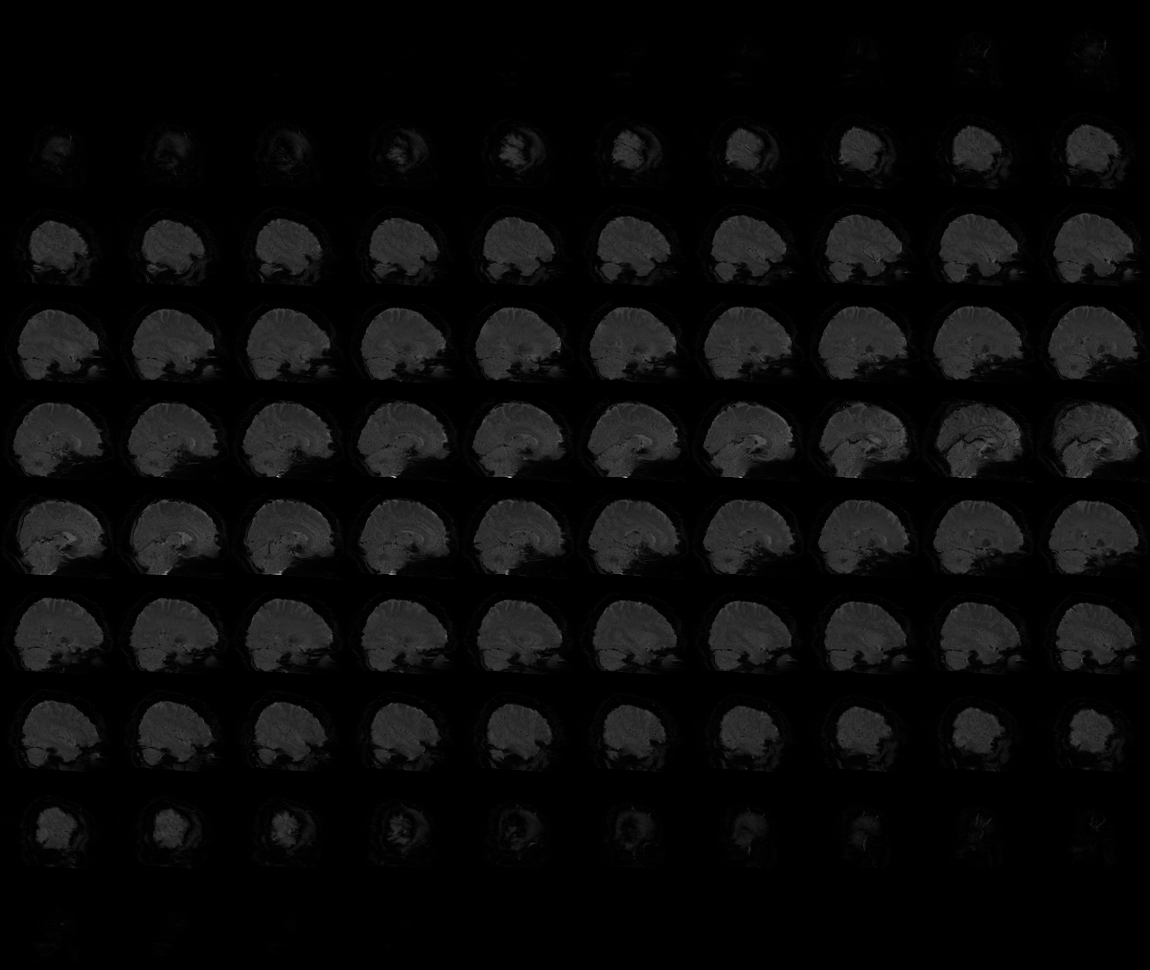
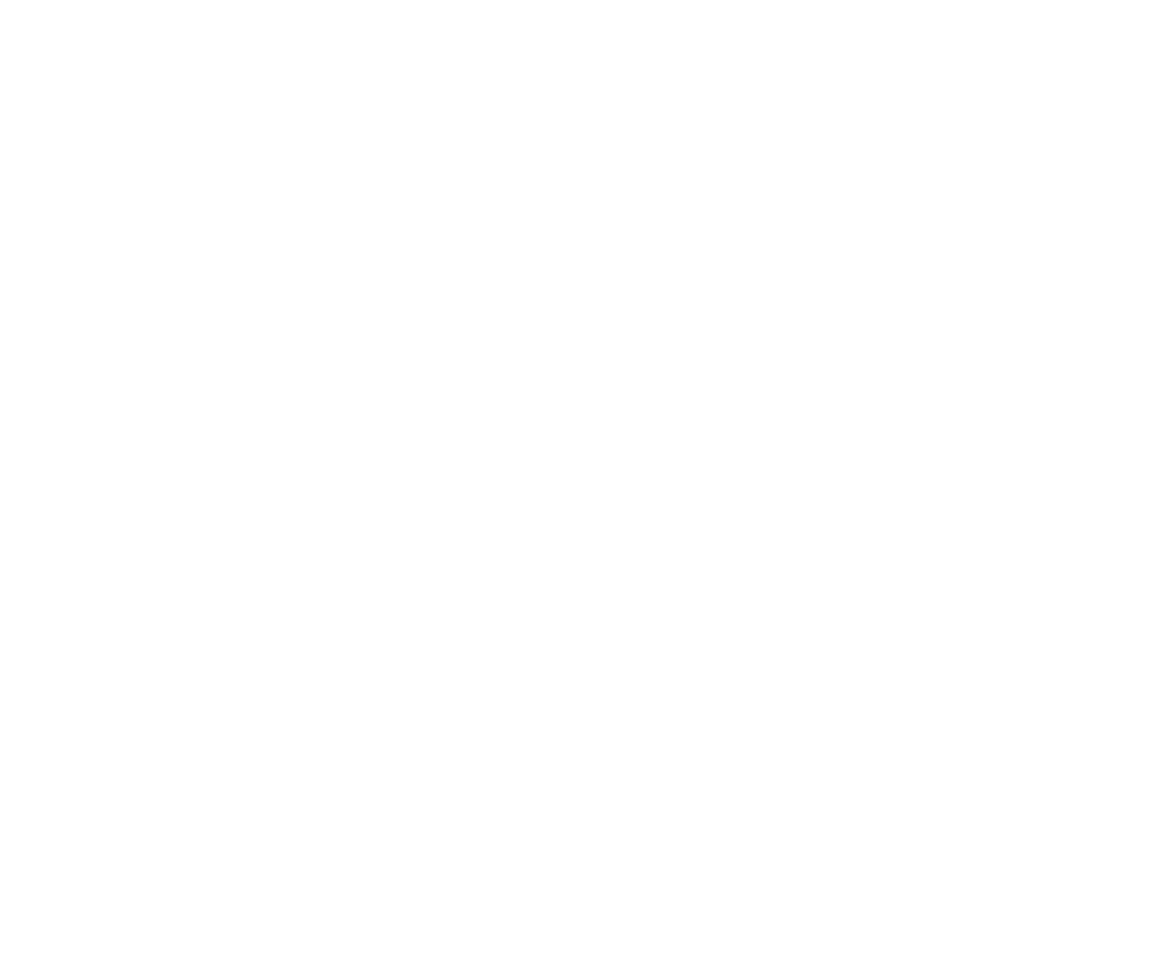

In [26]:
#mni_brain_file = os.path.join(derivatives_dir, 'mni_icbm152_t1_tal_nlin_asym_09c_mask.nii')
gm_file = os.path.join(derivatives_dir, 'mni_icbm152_gm_tal_nlin_asym_09c.nii')
example_func_file = os.path.join(fmriprep_dir,'sub-01','ses-01','func','sub-01_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz')

#mni_mask = nb.load(mni_brain_file)
gm_prob_mask = nb.load(gm_file)
example_func = nb.load(example_func_file)

gm_mask = image.math_img('img > 0.1', img=gm_prob_mask)
gm_mask_resampled = image.resample_img(gm_mask, target_affine=example_func.affine, target_shape=example_func.shape[0:3], interpolation="nearest")

plotting.view_img(gm_mask_resampled, bg_img=example_func.slicer[...,0], symmetric_cmap=False, colorbar=True, title='GM mask', opacity=0.5)

# mni_resampled = image.resample_img(
#     mni_mask, target_affine=example_func.affine, target_shape=example_func.shape[0:3], interpolation="nearest")

# plotting.view_img(mni_resampled)

## Clean and extract features

In [27]:
for subject in subject_list:
    for run in ['1','2','3','4']:

        img_clean = clean_func_image(fmriprep_dir, output_func_dir, gm_mask_resampled, subject, run, overwrite=False)
        events_split = edit_events_full_stability(data_root, subject, run)
        extract_features_for_stab(img_clean, events_split, output_feat_stab_dir, subject, run)
        
    estimate_stability(output_feat_stab_dir, output_mask_stab_dir, subject)

Cleaning functional image for subject 01, run 1...
Saving cleaned image for subject 01, run 1...
Functional image cleaned for subject 01, run 1.
Editing events for subject 01, run 1...
Events edited for subject 01, run 1.
Extracting features for subject 01 run 1...
9 conditions found per run.
Maximum number of trials per condition per run: 2
Done exporting features for subject 01 run 1.
Cleaning functional image for subject 01, run 2...
Saving cleaned image for subject 01, run 2...
Functional image cleaned for subject 01, run 2.
Editing events for subject 01, run 2...
Events edited for subject 01, run 2.
Extracting features for subject 01 run 2...
9 conditions found per run.
Maximum number of trials per condition per run: 2
Done exporting features for subject 01 run 2.
Cleaning functional image for subject 01, run 3...
Saving cleaned image for subject 01, run 3...
Functional image cleaned for subject 01, run 3.
Editing events for subject 01, run 3...
Events edited for subject 01, run 3

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 16/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 17/97...
X coordinate 18/97...
X coordinate 20/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 19/97...
X coordinate 21/97...
X coordinate 24/97...
X coordinate 22/97...
X coordinate 23/97...
X coordinate 25/97...
X coordinate 28/97...
X coordinate 26/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 29/97...
X coordinate 32/97...
X coordinate 27/97...
X coordinate 30/97...
X coordinate 33/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 34/97...
X coordinate 37/97...
X coordinate 40/97...
X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...
X coordinate 43/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 49/97...
X coordinate 52/97...
X coordinate 46/97...
X coordinate 50/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 47/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 57/97...
X coordinate 60/97...
X coordinate 51/97...
X coordinate 54/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 64/97...
X coordinate 55/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estimating stability for subject 01.
Cleaning fun

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 16/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 17/97...
X coordinate 18/97...
X coordinate 20/97...
X coordinate 19/97...
X coordinate 21/97...
X coordinate 22/97...
X coordinate 24/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 25/97...
X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 32/97...
X coordinate 29/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 33/97...
X coordinate 30/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...
X coordinate 43/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 46/97...
X coordinate 50/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 47/97...
X coordinate 57/97...
X coordinate 51/97...
X coordinate 54/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 55/97...
X coordinate 61/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 67/97...
X coordinate 72/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 78/97...
X coordinate 75/97...
X coordinate 80/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 17/97...
X coordinate 18/97...
X coordinate 20/97...
X coordinate 19/97...
X coordinate 21/97...
X coordinate 22/97...
X coordinate 24/97...
X coordinate 23/97...
X coordinate 25/97...
X coordinate 28/97...
X coordinate 26/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 29/97...
X coordinate 32/97...
X coordinate 27/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 33/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 34/97...
X coordinate 37/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 40/97...
X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...
X coordinate 43/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 46/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 50/97...
X coordinate 47/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 57/97...
X coordinate 51/97...
X coordinate 60/97...
X coordinate 54/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 55/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 79/97...
X coordinate 81/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 16/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 17/97...
X coordinate 18/97...
X coordinate 20/97...
X coordinate 19/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 21/97...
X coordinate 24/97...
X coordinate 22/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 23/97...
X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 32/97...
X coordinate 29/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 33/97...
X coordinate 30/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...
X coordinate 43/97...
X coordinate 52/97...
X coordinate 49/97...
X coordinate 46/97...
X coordinate 56/97...
X coordinate 50/97...
X coordinate 53/97...
X coordinate 47/97...
X coordinate 57/97...
X coordinate 60/97...
X coordinate 51/97...
X coordinate 54/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 55/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 80/97...
X coordinate 78/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 17/97...
X coordinate 18/97...
X coordinate 20/97...
X coordinate 19/97...
X coordinate 21/97...
X coordinate 24/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 22/97...
X coordinate 25/97...
X coordinate 23/97...
X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 32/97...
X coordinate 29/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 33/97...
X coordinate 30/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...
X coordinate 35/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...
X coordinate 43/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 46/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 50/97...
X coordinate 56/97...
X coordinate 47/97...
X coordinate 53/97...
X coordinate 57/97...
X coordinate 51/97...
X coordinate 60/97...
X coordinate 54/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 55/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 80/97...
X coordinate 78/97...
X coordinate 75/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 32/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 29/97...
X coordinate 27/97...
X coordinate 33/97...
X coordinate 30/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 43/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 46/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 50/97...
X coordinate 53/97...
X coordinate 47/97...
X coordinate 56/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 51/97...
X coordinate 57/97...
X coordinate 54/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 55/97...
X coordinate 61/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 80/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estimating stability for subject 06.
Cleaning fun

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 25/97...
X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 29/97...
X coordinate 32/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 30/97...
X coordinate 33/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 34/97...
X coordinate 37/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 43/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 46/97...
X coordinate 50/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 47/97...
X coordinate 57/97...
X coordinate 51/97...
X coordinate 54/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 55/97...
X coordinate 61/97...
X coordinate 59/97...
X coordinate 64/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 79/97...
X coordinate 81/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 21/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 24/97...
X coordinate 22/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 25/97...
X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 29/97...
X coordinate 32/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 30/97...
X coordinate 33/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 34/97...
X coordinate 37/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 39/97...
X coordinate 42/97...
X coordinate 45/97...
X coordinate 48/97...
X coordinate 43/97...
X coordinate 46/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 47/97...
X coordinate 50/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 57/97...
X coordinate 51/97...
X coordinate 54/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 55/97...
X coordinate 61/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 80/97...
X coordinate 78/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 16/97...
X coordinate 17/97...
X coordinate 18/97...
X coordinate 19/97...
X coordinate 20/97...
X coordinate 21/97...
X coordinate 24/97...
X coordinate 22/97...
X coordinate 23/97...
X coordinate 25/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 32/97...
X coordinate 29/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 33/97...
X coordinate 30/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 43/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 46/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 50/97...
X coordinate 56/97...
X coordinate 47/97...
X coordinate 53/97...
X coordinate 57/97...
X coordinate 51/97...
X coordinate 54/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 55/97...
X coordinate 61/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 80/97...
X coordinate 78/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 16/97...
X coordinate 17/97...
X coordinate 18/97...
X coordinate 19/97...
X coordinate 20/97...
X coordinate 21/97...
X coordinate 24/97...
X coordinate 22/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 25/97...
X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 32/97...
X coordinate 29/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 33/97...
X coordinate 30/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 43/97...
X coordinate 52/97...
X coordinate 49/97...
X coordinate 46/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 50/97...
X coordinate 47/97...
X coordinate 57/97...
X coordinate 54/97...
X coordinate 51/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 55/97...
X coordinate 61/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 79/97...
X coordinate 81/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 18/97...
X coordinate 20/97...
X coordinate 19/97...
X coordinate 21/97...
X coordinate 24/97...
X coordinate 22/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 25/97...
X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 29/97...
X coordinate 32/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 30/97...
X coordinate 33/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 34/97...
X coordinate 37/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...
X coordinate 43/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 46/97...
X coordinate 50/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 47/97...
X coordinate 51/97...
X coordinate 57/97...
X coordinate 54/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 55/97...
X coordinate 61/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 78/97...
X coordinate 75/97...
X coordinate 80/97...
X coordinate 79/97...
X coordinate 81/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 32/97...
X coordinate 29/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 33/97...
X coordinate 30/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 43/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 46/97...
X coordinate 50/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 47/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: Runtime

X coordinate 57/97...
X coordinate 51/97...
X coordinate 54/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 55/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 68/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 76/97...
X coordinate 75/97...
X coordinate 77/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estimating stability for subject 12.
Cleaning fun

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 15/97...
X coordinate 16/97...
X coordinate 17/97...
X coordinate 18/97...
X coordinate 20/97...
X coordinate 19/97...
X coordinate 21/97...
X coordinate 22/97...
X coordinate 24/97...
X coordinate 23/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 32/97...
X coordinate 29/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 33/97...
X coordinate 30/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...
X coordinate 42/97...
X coordinate 45/97...
X coordinate 48/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 43/97...
X coordinate 49/97...
X coordinate 46/97...
X coordinate 52/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 50/97...
X coordinate 47/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 57/97...
X coordinate 51/97...
X coordinate 60/97...
X coordinate 54/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 55/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 63/97...
X coordinate 68/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 16/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 17/97...
X coordinate 18/97...
X coordinate 20/97...
X coordinate 19/97...
X coordinate 21/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 22/97...
X coordinate 24/97...
X coordinate 23/97...
X coordinate 25/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 32/97...
X coordinate 29/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 33/97...
X coordinate 30/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...
X coordinate 40/97...
X coordinate 35/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...
X coordinate 42/97...
X coordinate 48/97...
X coordinate 45/97...
X coordinate 43/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 46/97...
X coordinate 50/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 47/97...
X coordinate 57/97...
X coordinate 51/97...
X coordinate 60/97...
X coordinate 54/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 55/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 63/97...
X coordinate 68/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 74/97...
X coordinate 71/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 83/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 16/97...
X coordinate 17/97...
X coordinate 18/97...
X coordinate 20/97...
X coordinate 19/97...
X coordinate 21/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 24/97...
X coordinate 22/97...
X coordinate 25/97...
X coordinate 23/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 32/97...
X coordinate 29/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 33/97...
X coordinate 30/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...
X coordinate 35/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...
X coordinate 42/97...
X coordinate 45/97...
X coordinate 48/97...
X coordinate 43/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 46/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 47/97...
X coordinate 50/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 51/97...
X coordinate 57/97...
X coordinate 54/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 55/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 68/97...
X coordinate 67/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 74/97...
X coordinate 71/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 29/97...
X coordinate 32/97...
X coordinate 27/97...
X coordinate 30/97...
X coordinate 33/97...
X coordinate 36/97...
X coordinate 34/97...
X coordinate 31/97...
X coordinate 37/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 40/97...
X coordinate 35/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 44/97...
X coordinate 39/97...
X coordinate 42/97...
X coordinate 45/97...
X coordinate 43/97...
X coordinate 48/97...
X coordinate 46/97...
X coordinate 52/97...
X coordinate 49/97...
X coordinate 47/97...
X coordinate 56/97...
X coordinate 50/97...
X coordinate 53/97...
X coordinate 57/97...
X coordinate 60/97...
X coordinate 51/97...
X coordinate 54/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 55/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 63/97...
X coordinate 68/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 72/97...
X coordinate 71/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 81/97...
X coordinate 79/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 16/97...
X coordinate 17/97...
X coordinate 18/97...
X coordinate 19/97...
X coordinate 20/97...
X coordinate 21/97...
X coordinate 22/97...
X coordinate 24/97...
X coordinate 23/97...
X coordinate 25/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 26/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 29/97...
X coordinate 32/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...
X coordinate 33/97...
X coordinate 31/97...
X coordinate 36/97...
X coordinate 34/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 35/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 38/97...
X coordinate 41/97...
X coordinate 39/97...
X coordinate 44/97...
X coordinate 42/97...
X coordinate 45/97...
X coordinate 43/97...
X coordinate 48/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 46/97...
X coordinate 49/97...
X coordinate 52/97...
X coordinate 47/97...
X coordinate 50/97...
X coordinate 56/97...
X coordinate 53/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 57/97...
X coordinate 51/97...
X coordinate 54/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 55/97...
X coordinate 59/97...
X coordinate 64/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 63/97...
X coordinate 68/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 67/97...
X coordinate 72/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 71/97...
X coordinate 76/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 80/97...
X coordinate 78/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estimating stability for subject 17.
Cleaning fun

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 29/97...
X coordinate 32/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 30/97...
X coordinate 33/97...
X coordinate 31/97...
X coordinate 36/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 37/97...
X coordinate 35/97...
X coordinate 40/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 38/97...
X coordinate 41/97...
X coordinate 39/97...
X coordinate 44/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 42/97...
X coordinate 45/97...
X coordinate 48/97...
X coordinate 43/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 49/97...
X coordinate 46/97...
X coordinate 52/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 50/97...
X coordinate 47/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 51/97...
X coordinate 54/97...
X coordinate 57/97...
X coordinate 60/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 63/97...
X coordinate 68/97...
X coordinate 66/97...
X coordinate 69/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 72/97...
X coordinate 71/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 79/97...
X coordinate 81/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordina

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 17/97...
X coordinate 18/97...
X coordinate 19/97...
X coordinate 20/97...
X coordinate 21/97...
X coordinate 22/97...
X coordinate 24/97...
X coordinate 23/97...
X coordinate 25/97...
X coordinate 28/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 29/97...
X coordinate 27/97...
X coordinate 32/97...
X coordinate 30/97...
X coordinate 33/97...
X coordinate 36/97...
X coordinate 31/97...
X coordinate 34/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 35/97...
X coordinate 40/97...
X coordinate 38/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 41/97...
X coordinate 39/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 44/97...
X coordinate 42/97...
X coordinate 45/97...
X coordinate 48/97...
X coordinate 43/97...
X coordinate 52/97...
X coordinate 49/97...
X coordinate 46/97...
X coordinate 47/97...
X coordinate 50/97...
X coordinate 53/97...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 56/97...
X coordinate 54/97...
X coordinate 51/97...
X coordinate 57/97...
X coordinate 60/97...
X coordinate 58/97...
X coordinate 55/97...
X coordinate 61/97...
X coordinate 64/97...
X coordinate 59/97...
X coordinate 62/97...
X coordinate 65/97...
X coordinate 63/97...
X coordinate 66/97...
X coordinate 68/97...
X coordinate 67/97...
X coordinate 69/97...
X coordinate 72/97...
X coordinate 70/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 75/97...
X coordinate 78/97...
X coordinate 80/97...
X coordinate 79/97...
X coordinate 81/97...
X coordinate 82/97...
X coordinate 83/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estimating stability for su